<a href="https://colab.research.google.com/github/syedareehaquasar/SUE---Safe-User-Experience/blob/master/PhishingWebsiteDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phishing Website Detection ML model training**

Designing model for creating phishing detection browser extension

# **Importing necessary modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Loading Data**

In [2]:
data0 = pd.read_csv('/content/drive/My Drive/SUE/data.csv')
data0.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


## **All about data**

In [3]:
data0.shape

(11055, 32)

In [4]:
data0.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

# **Visualizing Data**

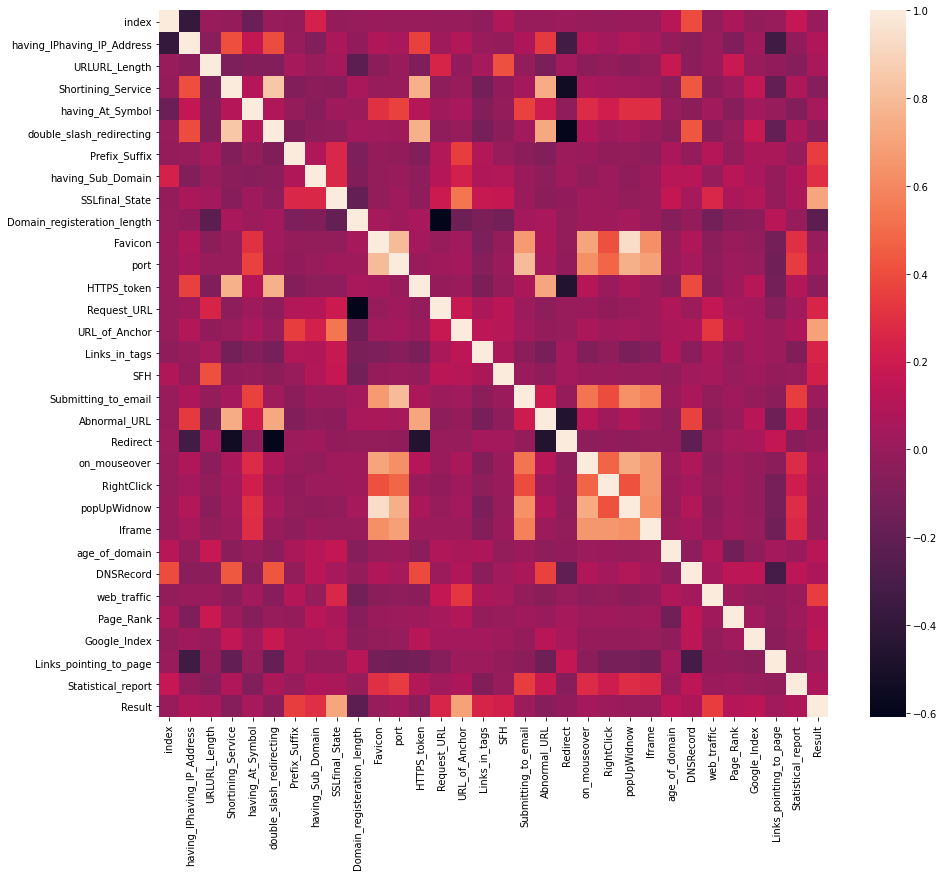

In [6]:
#correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **Data Preprocessing**

In [7]:
data0.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# checking data for null or missing values
data0.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [9]:
# shuffling data for better distribution while model training
data0 = data0.sample(frac=1).reset_index(drop=True)
data0.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,6436,1,1,1,1,1,-1,0,1,-1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,2057,1,-1,1,1,1,-1,0,-1,-1,1,1,1,-1,-1,1,-1,1,1,0,1,1,1,1,-1,-1,-1,-1,1,1,1,-1
2,8005,-1,1,1,1,1,-1,1,0,-1,1,1,1,1,-1,0,-1,1,1,0,1,1,1,1,1,1,-1,1,1,1,1,-1
3,905,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,-1,-1,-1,-1,1,1,-1
4,10078,-1,-1,1,1,1,-1,0,0,1,1,1,1,-1,0,-1,-1,1,1,0,1,1,1,1,-1,1,1,-1,1,0,1,-1


In [10]:
# droping index it has no significance in model training
data = data0.drop(['index'], axis = 1).copy()

In [11]:
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,1,1,1,-1,0,1,-1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,1,-1,1,1,1,-1,0,-1,-1,1,1,1,-1,-1,1,-1,1,1,0,1,1,1,1,-1,-1,-1,-1,1,1,1,-1
2,-1,1,1,1,1,-1,1,0,-1,1,1,1,1,-1,0,-1,1,1,0,1,1,1,1,1,1,-1,1,1,1,1,-1
3,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,-1,-1,-1,-1,1,1,-1
4,-1,-1,1,1,1,-1,0,0,1,1,1,1,-1,0,-1,-1,1,1,0,1,1,1,1,-1,1,1,-1,1,0,1,-1


In [12]:
# seperating and assigning features and target columns to X and Y
Y = data['Result']
X = data.drop('Result', axis = 1)
X.shape, Y.shape

((11055, 30), (11055,))

In [13]:
#splitting the data into train and test sets: 80 - 20 split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8844, 30), (2211, 30), (8844,), (2211,))

In [14]:
fl = X_test[1:1]
fl.shape

(0, 30)

# **Building Models and Training them**

In [15]:
#importing packages
from sklearn.metrics import accuracy_score

In [16]:
# Creating holders to store the model performance results
ML_Model = []
accuracy_train = []
accuracy_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  accuracy_train.append(round(a, 3))
  accuracy_test.append(round(b, 3))

## **K-Nearest Neighbors**

In [17]:
# K-Nearest Neighbors model 
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model 
KNN = KNeighborsClassifier(n_neighbors = 5)

# fit the model 
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
#predicting the target value from the model for the samples
Y_test_KNN = KNN.predict(X_test)
Y_train_KNN = KNN.predict(X_train)

In [19]:
#performance test

#computing the accuracy of the model performance
acc_train_KNN = accuracy_score(Y_train,Y_train_KNN)
acc_test_KNN = accuracy_score(Y_test,Y_test_KNN)

print("K-Nearest Neighbors: Accuracy on training Data: {:.3f}".format(acc_train_KNN))
print("K-Nearest Neighbors: Accuracy on test Data: {:.3f}".format(acc_test_KNN))

K-Nearest Neighbors: Accuracy on training Data: 0.963
K-Nearest Neighbors: Accuracy on test Data: 0.936


In [20]:
storeResults('K-Nearest Neighbors', acc_train_KNN, acc_test_KNN)

## **Decision Tree Classifier**

In [21]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

# fit the model 
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
#predicting the target value from the model for the samples
Y_test_tree = tree.predict(X_test)
Y_train_tree = tree.predict(X_train)

In [23]:
#performance test

#computing the accuracy of the model performance
accuracy_train_tree = accuracy_score(Y_train,Y_train_tree)
accuracy_test_tree = accuracy_score(Y_test,Y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(accuracy_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(accuracy_test_tree))

Decision Tree: Accuracy on training Data: 0.923
Decision Tree: Accuracy on test Data: 0.914


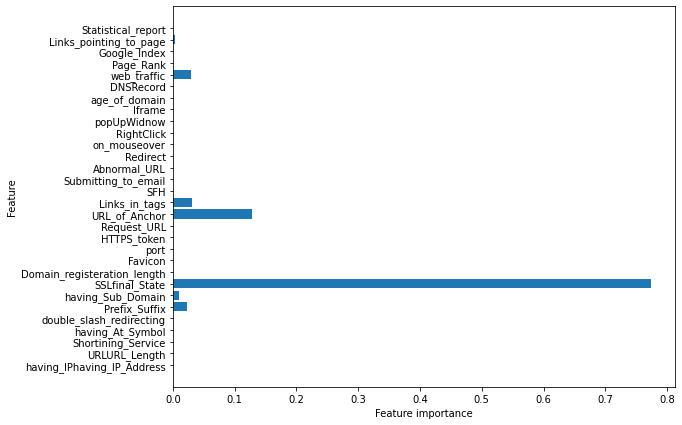

In [24]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [25]:
storeResults('Decision Tree', accuracy_train_tree, accuracy_test_tree)

## **Logistic Regression**

In [26]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logReg = LogisticRegression(solver='liblinear', penalty='l1')

# fit the model
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# predicting the target valuesfrom model for the sample
y_test_logReg = logReg.predict(X_test)
y_train_logReg = logReg.predict(X_train)

In [28]:
# Computing the accuracy of model performance
acc_train_logReg =accuracy_score(Y_train, y_train_logReg)
acc_test_logReg = accuracy_score(Y_test, y_test_logReg)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logReg))
print("Logistic Regression: Accuracy on testing Data: {:.3f}".format(acc_test_logReg))

Logistic Regression: Accuracy on training Data: 0.930
Logistic Regression: Accuracy on testing Data: 0.925


In [29]:
storeResults('Logistic Regression', acc_train_logReg, acc_test_logReg)

## **Random Classifier**

In [30]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# predicting the target values from model for the samples

y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [32]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(Y_train,y_train_forest)
acc_test_forest = accuracy_score(Y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.932
Random forest: Accuracy on test Data: 0.930


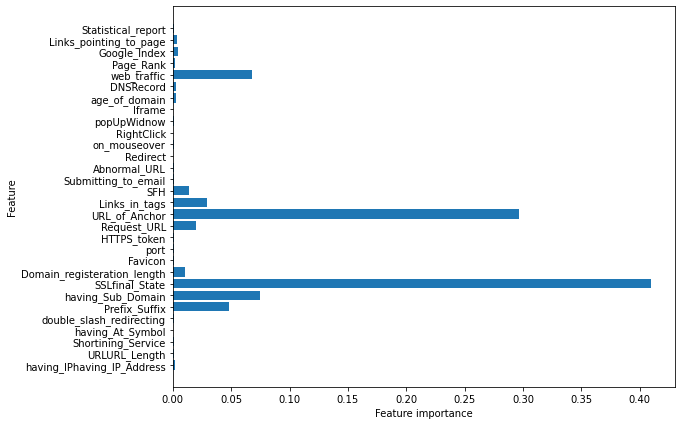

In [33]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [34]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## **Multilayer Perceptiontrons (MLPs) : Deep Learning**

In [35]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [36]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [37]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(Y_train,y_train_mlp)
acc_test_mlp = accuracy_score(Y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.990
Multilayer Perceptrons: Accuracy on test Data: 0.967


In [38]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **XGBoost Classifier**

In [39]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

#fit the model
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [41]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(Y_train,y_train_xgb)
acc_test_xgb = accuracy_score(Y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.989
XGBoost : Accuracy on test Data: 0.972


In [42]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **Support Vector Machines**

In [43]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

#fit the model
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [45]:
# performance evaluation
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(Y_train,y_train_svm)
acc_test_svm = accuracy_score(Y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.929
SVM : Accuracy on test Data: 0.925


In [46]:
storeResults('SVM', acc_train_svm, acc_test_svm)

# **Model Comparisons**

In [47]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,K-Nearest Neighbors,0.963,0.936
1,Decision Tree,0.923,0.914
2,Logistic Regression,0.930,0.925
3,Random Forest,0.932,0.930
4,Multilayer Perceptrons,0.990,0.967
5,XGBoost,0.989,0.972
6,SVM,0.929,0.925


In [48]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
5,XGBoost,0.989,0.972
4,Multilayer Perceptrons,0.990,0.967
0,K-Nearest Neighbors,0.963,0.936
3,Random Forest,0.932,0.930
2,Logistic Regression,0.930,0.925
6,SVM,0.929,0.925
1,Decision Tree,0.923,0.914


# **Saving and loading model with best accuracy**

In [49]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("/content/drive/My Drive/SUE/XGBoostClassifier.pickle.dat", "wb"))

In [50]:
# load model from file
loaded_model = pickle.load(open("/content/drive/My Drive/SUE/XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
# loaded_model.predict()

# Feature Extraction

In [52]:
import sys
import csv
import pandas as pd
import regex
import ipaddress
!pip install tldextract
from tldextract import extract
import ssl
from urllib.request import urlopen, Request
import xml.etree.ElementTree as ET
import datetime
from bs4 import BeautifulSoup
import urllib, bs4, re
from googlesearch import search
!pip install whois
import whois
from datetime import datetime
import time
import requests
import urllib.request
from urllib.parse import urlencode
import subprocess
import urllib3, requests, json
import socket 

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for whois: filename=whois-0.9.7-cp36-none-any.whl size=8889 sha256=030ba8299ea1cb38de5f7953dbb99a9e640d2cf70bad541ec1376270a512448d
  Stored in directory: /root/.cache/pip/wheels/56/4c/53/02bc75ef02bd738b5ee9ece5bd61f86ba25c543aebca583cd2
Successfully built whois


In [53]:
url = "google.com"
domain, subDomain, suffix = extract(url)
# Converts the given URL into standard format
if not regex.match(r"^https?", url):
    url = "http://" + url


# Stores the response of the given URL
try:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
except:
    response = ""
    soup = -999

# Extracts global rank of the website
try:
    global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
except:
    global_rank = -1

# Extracts domain from the given URL
domain = re.findall(r"://([^/]+)/?", url)[0]
if re.match(r"^www.",domain):
	domain = domain.replace("www.","")

# Extracts global rank of the website
try:
    global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
except:
    global_rank = -1

1

In [54]:
def having_IPhaving_IP_Address():
    try:
        ipaddress.ip_address(url)
        return -1 #phishing
        
    except:
        return 1
#url = "::ffff:0:0/96"
#url = "https://colab.research.google.com/drive/1jMU6LoeG6rvic9KpcpzJqSd7wavK2t3k#scrollTo=aBEQaCRudJP8"
#print(having_IPhaving_IP_Address(url))

In [55]:
def URLURL_Length():
    if (len(url) < 54) :
        return 1
    else:
        return -1
#print(URLURL_Length(url))

In [56]:
def Shortining_Service():
    shortining = regex.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
    if shortining:
        return -1
    else:
        return 1
#print(Shortining_Service(url))
#url = 'bit.ly/19DXSk4'
#print(Shortining_Service(url))

In [57]:
def having_At_Symbol():
    at_symbol = regex.findall(r'@',url)
    if(len(at_symbol) == 0): #if @ symbol is not in url then its safe
        return 1
    else:
        return -1
#url = "https://www.kaggle.com/akashkr/phishing-website-dataset"
#print(having_At_Symbol(url))

In [58]:
def double_slash_redirecting():
    locate_double_slash = [x.start(0) for x in re.finditer('//', url)] #making list of each individual character
    if locate_double_slash[len(locate_double_slash)-1] > 6: #checking if // occures after 6th position
        return -1
    else:
        return 1

# print(double_slash_redirecting(url))
# url = 'http://www.legitimate.com//http://www.phishing.com'  
# print(double_slash_redirecting(url))      

In [59]:
def Prefix_Suffix():
    subDomain, domain, suffix = extract(url)
 #   print(subDomain,domain,suffix)
    print(domain.count("-"))
    if(domain.count('-')):
        return -1
    else:
        return 1  
#url ='http://www.Confirme-paypal.com/'
#print(Prefix_Suffix(url))

In [60]:
def having_Sub_Domain():
    subDomain, domain, suffix = extract(url)
    #print(subDomain)
    if len(re.findall("\.",url)) == 1:
        return 1
    elif len(re.findall("\.", url)) == 2:
        return 0
    else:
        return -1
#url = "http://www.hud.ac.uk/students/"
#url = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree"
#url = "https://colab.research.google.com/drive/1jMU6LoeG6rvic9KpcpzJqSd7wavK2t3k#scrollTo=BScmFtFpz4mq"
#print(having_Sub_Domain(url))


In [61]:
def SSLfinal_State():
    try:
        # check wheather contains https
        if (regex.search('^https', url)):
            usehttps = 1
        else:
            usehttps = 0
        subDomain, domain, suffix = extract(url)
        host_name = domain + "." + suffix
        context = ssl.create_default_context()
        sct = context.wrap_socket(socket.socket(), server_hostname=host_name)
        sct.connect((host_name, 443))
        certificate = sct.getpeercert()
        issuer = dict(x[0] for x in certificate['issuer'])
        certificate_Auth = str(issuer['commonName'])
        certificate_Auth = certificate_Auth.split()
        if (certificate_Auth[0] == "Network" or certificate_Auth == "Deutsche"):
            certificate_Auth = certificate_Auth[0] + " " + certificate_Auth[1]
        else:
            certificate_Auth = certificate_Auth[0]
        trusted_Auth = ['AC Camerfirma, S.A', 'Actalis', 'Agencia Notarial de Certificación (ANCERT)', 'Amazon', 'Asseco Data Systems S.A. (previously Unizeto Certum)', 'Comodo', 'Symantec', 'GoDaddy', 'GlobalSign', 'DigiCert', 'StartCom', 'Entrust', 'Verizon',
                        'A-Trust','Trustwave', 'Unizeto', 'Buypass', 'QuoVadis', 'Deutsche Telekom', 'Network Solutions',
                        'SwissSign', 'Google Trust Services (GTS)','Government of Australia' ,'IdenTrust', 'Secom', 'TWCA', 'GeoTrust', 'Thawte', 'Doster', 'VeriSign', 'Google',
                        'Government of India, Ministry of Communications & Information Technology, Controller of Certifying Authorities (CCA)',
                        'Symantec / VeriSign']

        # age of certificate
        startingDate = str(certificate['notBefore'])
        endingDate = str(certificate['notAfter'])
        startingYear = int(startingDate.split()[3])
        endingYear = int(endingDate.split()[3])
        Age_of_certificate = endingYear - startingYear
        #print(str(usehttps) + " , " + certificate_Auth + " , " + str(Age_of_certificate))
        if ((usehttps == 1) and (certificate_Auth in trusted_Auth) and (Age_of_certificate >= 1)):
            return 1  # legitimate
        else:
            return -1  # phishing

    except Exception as e:
        return -1
#print(SSLfinal_State(url))

In [62]:
#url = "google.com"
def Domain_registration_length():
    return 0
    domain = whois.query(url)
    if isinstance(domain.expiration_date, list):
        expiration_date = domain.expiration_date[0]
    else:
        expiration_date = domain.expiration_date
    expiration_date = str(expiration_date).split(' ')[0]
    expiration_date = datetime.strptime(str(expiration_date), '%Y - %m - %d')
    today = time.strftime('%Y - %m - %d')
    today = datetime.strptime(today, '%Y-%m-%d')
    registration_length = abs((expiration_date - today).days)

    return round(registration_length/365,2)
#print(Domain_registration_length(url))

In [63]:
subDomain, domain, suffix = extract(url)
def favicon():
    if soup == -999:
        return -1
    else:
        try:
            for head in soup.find_all('head'):
                for head.link in soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
                        raise StopIteration
                    else:
                        return -1
                        raise StopIteration
        except:
            return 1
            raise StopIteration
        return 1

#print(favicon(domain))
#print(domain)                

In [64]:
#url = "https://colab.research.google.com/drive/1jMU6LoeG6rvic9KpcpzJqSd7wavK2t3k#scrollTo=r0OoseH3zTjN"
def port():
    try:
        port = domain.split(":")[1]
        
        if port:
            return -1
        else:
            return 1
    except:
        return 1

#print(port(url))  
#print(url)      

In [65]:
def HTTPS_token(url):
    check = re.search('https://|http://', url)
    if check.start(0) == 0:
        url = url[check.end(0):]
    check = re.search('http|https', url)
    if check:
        return -1
    else:
        return 1
#print(HTTPS_token(url))

In [66]:
def Request_url():
    i = 0
    success = 0
    if soup == -999:
        return -1
    else:
        for img in soup.find_all('img', src= True):
           dots= [x.start(0) for x in re.finditer('\.', img['src'])]
           if url in img['src'] or domain in img['src'] or len(dots)==1:
              success = success + 1
           i=i+1

        for audio in soup.find_all('audio', src= True):
           dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
           if url in audio['src'] or domain in audio['src'] or len(dots)==1:
              success = success + 1
           i=i+1

        for embed in soup.find_all('embed', src= True):
           dots=[x.start(0) for x in re.finditer('\.',embed['src'])]
           if url in embed['src'] or domain in embed['src'] or len(dots)==1:
              success = success + 1
           i=i+1

        for iframe in soup.find_all('iframe', src= True):
           dots=[x.start(0) for x in re.finditer('\.',iframe['src'])]
           if url in iframe['src'] or domain in iframe['src'] or len(dots)==1:
              success = success + 1
           i=i+1

        try:
           percentage = success/float(i) * 100
           if percentage < 22.0 :
              dataset.append(1)
           elif((percentage >= 22.0) and (percentage < 61.0)) :
              return 0
           else :
              return -1
        except:
            return 1
#print(Request_url(domain))

In [67]:
def Url_of_Anchor():
    percentage = 0
    i = 0
    unsafe = 0
    if soup == -999:
        return -1
    else:
        for a in soup.find_all('a', href=True):
        # 2nd condition was 'JavaScript ::void(0)' but we put JavaScript because the space between javascript and :: might not be
                # there in the actual a['href']
            if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or domain in a['href']):
                unsafe = unsafe + 1
            i = i + 1


        try:
            percentage = unsafe / float(i) * 100
        except:
            return 1

        if percentage < 31.0:
            data_set.append(1)
        elif ((percentage >= 31.0) and (percentage < 67.0)):
            return 0
        else:
            return -1
#print(Url_of_Anchor(domain))

In [68]:
def Links_in_tags():
    i=0
    success =0
    if soup == -999:
        return -1
    else:
        for link in soup.find_all('link', href= True):
           dots=[x.start(0) for x in re.finditer('\.',link['href'])]
           if url in link['href'] or domain in link['href'] or len(dots)==1:
              success = success + 1
           i=i+1

        for script in soup.find_all('script', src= True):
           dots=[x.start(0) for x in re.finditer('\.',script['src'])]
           if url in script['src'] or domain in script['src'] or len(dots)==1 :
              success = success + 1
           i=i+1
        try:
            percentage = success / float(i) * 100
        except:
            return 1

        if percentage < 17.0 :
           return 1
        elif((percentage >= 17.0) and (percentage < 81.0)) :
           return 0
        else :
           return -1

#print(Links_in_tags(soup,domain))      

In [69]:
#url = "https://colab.research.google.com/drive/1jMU6LoeG6rvic9KpcpzJqSd7wavK2t3k#scrollTo=R4uDoJKnlod7"
subDomain, domain, suffix = extract(url)
def SFH():
    return 0
    try:
        if soup == -999:
            return -1
            for form in soup.find_all('form', action= True):
                if form['action'] =="" or form['action'] == "about:blank" :
                    return -1
                elif url not in form['action'] and domain not in form['action']:
                    return 0
                else:
                    return 1
                 
    except:
        return 1          
#print(SFH(url))

In [70]:
def Submitting_to_email():
    if response == "":
        return 1
    else:
        if re.findall(r"[mail\(\)|mailto:?]", response.text):
            return -1
        else:
            return 1
#print(Submitting_to_email(url))            

In [71]:
def Abnormal_URL():
    if response == "":
        return -1
    else:
        if response.text == "":
            return 1
        else:
            return -1
#print(Abnormal_URL(domain,url))            


In [72]:
def Redirect():
    if response == "":
        return -1
    else:
        if len(response.history) <= 1:
            return -1
        elif len(response.history) <= 4:
            return 0
        else:
            return 1
#print(Redirect(url))          

In [73]:
def on_mouseover():
    if response == "" :
        return -1
    else:
        if re.findall("<script>.+onmouseover.+</script>", response.text):
            return 1
        else:
            return -1
#print(on_mouseover(url))


In [74]:
def RightClick():
    if response == "":
        return -1
    else:
        if re.findall(r"event.button ?== ?2", response.text):
            return 1
        else:
            return -1
#print(RightClick(url))

In [75]:
def popUpWindow():
    if response == "":
        return -1
    else:
        if re.findall(r"alert\(", response.text):
            return 1
        else:
            return -1
#print(popUpWindow(url))

In [76]:
def Iframe():
    if response == "":
        return -1
    else:
        if re.findall(r"[<iframe>|<frameBorder>]", response.text):
            return 1
        else:
            return -1
#print(Iframe(url))            


In [77]:
def age_of_domain():
    if response == "":
        return -1
    else:
        try:
            registration_date = re.findall(r'Registration Date:</div><div class="df-value">([^<]+)</div>', whois_response.text)[0]
            if diff_month(date.today(), date_parse(registration_date)) >= 6:
                return -1
            else:
                return 1
        except:
            return 1
#print(age_of_domain(url))

In [78]:
def DNSRecord():
    dns = 1
    try:
        d = whois.whois(domain)
    except:
        dns=-1
    if dns == -1:
        return -1
    else:
        if registration_length / 365 <= 1:
            return -1
        else:
            return 1
#print(DNSRecord(domain))

In [79]:
def web_traffic():
    try:
        with urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url) as response:
            html = response.read()
    except:
        return -1

    tree = ET.fromstring(html.decode())
    try:
        rank = (tree.findall('*/REACH'))[0].attrib['RANK']
    except:
        return -1
    if (int(rank)<100000):
        return 1
    else:
        return -1
#print(web_traffic(url))

In [80]:
def Page_Rank():
    try:
        if global_rank > 0 and global_rank < 100000:
            return -1
        else:
            return 1
    except:
        return 1
#print(Page_Rank(url))

In [81]:
def Google_Index():
    site = search(url, 5)
    if site:
        return 1
    else:
        return -1
#print(Google_Index(url))        

In [82]:
def Links_pointing_to_page():
    if response == "":
        return -1
    else:
        num_of_links = len(re.findall(r"<a href=", response.text))
        if num_of_links == 0:
            return 1
        elif num_of_links <= 2:
            return 0
        else:
            return -1
#print(Links_pointing_to_page(url))

In [83]:
def Statical_report():
    return 0
    url_match = re.search('at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly',url)
    try:
        ip_address = socket.gethostbyname(domain)
        ip_match=re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                           '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                           '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                           '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                           '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                           '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42',ip_address)
        if url_match:
            return -1
        elif ip_match:
            return -1
        else:
            return 1
    except:
        return 0
#print(Statical_report(url))

# Feature Extraction Final Function

In [84]:
def final(url):
    return [having_IPhaving_IP_Address(),URLURL_Length(),Shortining_Service(),having_At_Symbol(), 0,Prefix_Suffix (),having_Sub_Domain(),SSLfinal_State(),Domain_registration_length(),favicon(),port(),0,Request_url(),Url_of_Anchor(),Links_in_tags(),SFH(),Submitting_to_email(),Abnormal_URL(),Redirect(),on_mouseover(),RightClick(),popUpWindow(),Iframe(),age_of_domain(),DNSRecord(), web_traffic(),Page_Rank(),Google_Index(),Links_pointing_to_page(), Statical_report()]
# double_slash_redirecting() ,  HTTPS_token(url)


print(final("www..google.com"))

0
[1, 1, 1, 1, 0, 1, 1, -1, 0, 1, 1, 0, -1, 0, 1, 0, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 0]


# Model Testing

In [85]:
fl

col = ["having_IPhaving_IP_Address",	"URLURL_Length",	"Shortining_Service",	"having_At_Symbol",	"double_slash_redirecting",	"Prefix_Suffix",	"having_Sub_Domain",	"SSLfinal_State",	"Domain_registeration_length",	"Favicon",	"port",	"HTTPS_token",	"Request_URL",	"URL_of_Anchor",	"Links_in_tags",	"SFH",	"Submitting_to_email",	"Abnormal_URL",	"Redirect",	"on_mouseover",	"RightClick",	"popUpWidnow",	"Iframe",	"age_of_domain",	"DNSRecord",	"web_traffic",	"Page_Rank",	"Google_Index",	"Links_pointing_to_page",	"Statistical_report"]

In [86]:
# x = "www.google.com"
# features_test = np.array(x).reshape((1, -1))
# loaded_model.predict([-1, -1,	1, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 0, 1, 1, 1, 1, -1, 1, 0, -1, 1, 0, 1])
a = [[-1, -1,	1, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 0, 1, 1, 1, 1, -1, 1, 0, -1, 1, 0, 1]]
df = pd.DataFrame(a,  columns =  col)
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,-1,1,1,1,-1,0,1,1,1,1,1,1,-1,-1,-1,1,1,0,1,1,1,1,-1,1,0,-1,1,0,1


In [87]:
loaded_model.predict(df)

array([-1])

In [88]:
google = final("www.google.com")

0


In [89]:
d = pd.DataFrame([google], columns = col)
loaded_model.predict(d)

array([1])